This IPython Notebook handles the training and evaluation of a neural net that produces a heatmap of edge likelihood from an unsaturated image

In [1]:
# Handle imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import embed
import torch
import torch.nn as nn


In [2]:
class ImageGenerator():
    def __init__(self, shape: tuple, batchSize: int):
        self.shape = np.array(shape)

    def generate_image(self) -> np.ndarray:
        shapeBGR = (self.shape[1], self.shape[0], 3)
        imageBGR = np.zeros(shapeBGR, 'uint8')

        # make array of corner indeces
        corners = np.array([[0,0],[0,1],[1,1],[1,0],[0,0],[0,1],[1,1],[1,0]]) * (self.shape - 1)
        b = np.random.randint(0,4)  # random starting corner
        c = np.random.randint(1,4) + b  # pick 1-3 total corners

        # pick random edge points for edge line
        rands = np.random.random(2)
        dir0 = corners[b] - corners[b-1]
        dir1 = corners[c] - corners[c-1]
        point0 = dir0*rands[0] + corners[b-1]
        point1 = dir1*rands[1] + corners[c-1]

        # construct polygon
        polygon = corners[b:c]
        polygon = np.concatenate(([point0], polygon, [point1]), axis=0)
        polygon = polygon.astype(np.int32)
        polygon = np.expand_dims(polygon, 1)
        cv2.fillPoly(imageBGR, [polygon], (255,255,255), lineType=cv2.LINE_AA)

        image = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2GRAY)

        edgeImageBGR = np.zeros(shapeBGR, 'uint8')
        edge = [0, -1]
        cv2.polylines(edgeImageBGR, [polygon[edge]], False, (255,255,255), lineType=cv2.LINE_AA)

        edgeImage = cv2.cvtColor(edgeImageBGR, cv2.COLOR_BGR2GRAY)

        return image, edgeImage



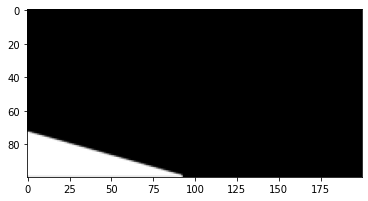

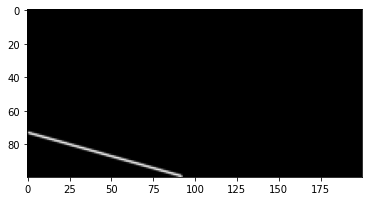

In [3]:
generator = ImageGenerator((200, 100), 1)
img, edgeImg = generator.generate_image()

def imshow(image: np.ndarray):
    if image.ndim == 2:
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    elif image.ndim == 3:
        plt.imshow(image[:,:,::-1])
    else:
        raise(ValueError)
    plt.show()

imshow(img)
imshow(edgeImg)

In [ ]:
# Test for the random polygon algorithm
a = np.array([[0,0],[0,2],[1,2],[1,0],[0,0],[0,2],[1,2],[1,0]])
b = np.random.randint(0,4)
c = np.random.randint(1,4) + b
print(b, c)
rands = np.random.random(2)
point0 = (a[b] - a[b-1])*rands[0] + a[b-1]
point1 = (a[c] - a[c-1])*rands[1] + a[c-1]

poly = a[b:c]
poly = np.concatenate(([point0], poly, [point1]), axis=0)

print(poly)

1 3
[[0.         0.90314412]
 [0.         2.        ]
 [1.         2.        ]
 [1.         1.88318445]]


In [ ]:
class UNet(nn.Module):
  """ Implements the UNet architecture for cancer detection """
  def __init__(self):
    super(UNet, self).__init__()
    self.conv1 = nn.Conv2d(1,64,kernel_size = (3, 3), padding = (1,1))
    self.relu2 = nn.ReLU()
    self.conv3 = nn.Conv2d(64,64,kernel_size = (3, 3), padding = (1,1))
    self.relu4 = nn.ReLU()
    self.max5 = nn.MaxPool2d(kernel_size = (2, 2), stride = 2, padding = (0,0))
    
    self.conv6 = nn.Conv2d(64,128,kernel_size = (3, 3), padding = (1,1))
    self.relu7 = nn.ReLU()
    self.conv8 = nn.Conv2d(128,128,kernel_size = (3, 3), padding = (1,1))
    self.relu9 = nn.ReLU()
    self.max10 = nn.MaxPool2d(kernel_size = (2, 2), padding = (0,0))
    
    self.conv11 = nn.Conv2d(128,256,kernel_size = (3, 3), padding = (1,1))
    self.relu12 = nn.ReLU()
    self.conv13 = nn.Conv2d(256,256,kernel_size = (3, 3), padding = (1,1))
    self.relu14 = nn.ReLU()
    self.max15 = nn.MaxPool2d(kernel_size = (2, 2), padding = (0,0))
    
    self.conv16 = nn.Conv2d(256,512,kernel_size = (3, 3), padding = (1,1))
    self.relu17 = nn.ReLU()
    self.conv18 = nn.Conv2d(512,512,kernel_size = (3, 3), padding = (1,1))
    self.relu19 = nn.ReLU()
    self.max20 = nn.MaxPool2d(kernel_size = (2, 2), padding = (0,0))
    
    self.conv21 = nn.Conv2d(512,1024,kernel_size = (3, 3), padding = (1,1))
    self.relu22 = nn.ReLU()
    self.conv23 = nn.Conv2d(1024,1024,kernel_size = (3, 3), padding = (1,1))
    self.relu24 = nn.ReLU()
    self.upcon25 = nn.ConvTranspose2d(1024, 512, kernel_size = (2,2), padding = 0, stride=2)
    
    self.conv26 = nn.Conv2d(1024,512,kernel_size = (3, 3), padding = (1,1))
    self.relu27 = nn.ReLU()
    self.conv28 = nn.Conv2d(512,512,kernel_size = (3, 3), padding = (1,1))
    self.relu29 = nn.ReLU()
    self.upcon30 = nn.ConvTranspose2d(512, 256, kernel_size = (2,2), padding = 0, stride=2)
    
    self.conv31 = nn.Conv2d(512,256,kernel_size = (3, 3), padding = (1,1))
    self.relu32 = nn.ReLU()
    self.conv33 = nn.Conv2d(256,256,kernel_size = (3, 3), padding = (1,1))
    self.relu34 = nn.ReLU()
    self.upcon35 = nn.ConvTranspose2d(256, 128, kernel_size = (2,2), padding = 0, stride=2)
    
    self.conv36 = nn.Conv2d(256,128,kernel_size = (3, 3), padding = (1,1))
    self.relu37 = nn.ReLU()
    self.conv38 = nn.Conv2d(128,128,kernel_size = (3, 3), padding = (1,1))
    self.relu39 = nn.ReLU()
    self.upcon40 = nn.ConvTranspose2d(128, 64, kernel_size = (2,2), padding = 0, stride=2)
    
    self.conv41 = nn.Conv2d(128,64,kernel_size = (3, 3), padding = (1,1))
    self.relu42 = nn.ReLU()
    self.conv43 = nn.Conv2d(64,64,kernel_size = (3, 3), padding = (1,1))
    self.relu44 = nn.ReLU()
    self.conv45 = nn.Conv2d(64,1,kernel_size = 1, padding = 0)

 
  def forward(self, input):
    o1 = self.conv1(input)
    o2 = self.relu2(o1)
    o3 = self.conv3(o2)
    o4 = self.relu4(o3)
    o5 = self.max5(o4)
    
    o6 = self.conv6(o5)
    o7 = self.relu7(o6)
    o8 = self.conv8(o7)
    o9 = self.relu9(o8)
    o10 = self.max10(o9)
    
    o11 = self.conv11(o10)
    o12 = self.relu12(o11)
    o13 = self.conv13(o12)
    o14 = self.relu14(o13)
    o15 = self.max15(o14)
    
    o16 = self.conv16(o15)
    o17 = self.relu17(o16)
    o18 = self.conv18(o17)
    o19 = self.relu19(o18)
    o20 = self.max20(o19)
    
    o21 = self.conv21(o20)
    o22 = self.relu22(o21)
    o23 = self.conv23(o22)
    o24 = self.relu24(o23)
    o25 = self.upcon25(o24)

    in25 = torch.cat((o25, o19), 1)
    
    o26 = self.conv26(in25)
    o27 = self.relu27(o26)
    o28 = self.conv28(o27)
    o29 = self.relu29(o28)
    o30 = self.upcon30(o29)

    in30 = torch.cat((o30, o14), 1)
    
    o31 = self.conv31(in30)
    o32 = self.relu32(o31)
    o33 = self.conv33(o32)
    o34 = self.relu34(o33)
    o35 = self.upcon35(o34)

    in35 = torch.cat((o35, o9), 1)
    
    o36 = self.conv36(in35)
    o37 = self.relu37(o36)
    o38 = self.conv38(o37)
    o39 = self.relu39(o38)
    o40 = self.upcon40(o39)

    in40 = torch.cat((o40, o4), 1)
    
    o41 = self.conv41(in40)
    o42 = self.relu42(o41)
    o43 = self.conv43(o42)
    o44 = self.relu44(o43)
    o45 = self.conv45(o44)

    # print(o44.shape)
    # print(o45.shape)
    # print(in35.shape)

    
    
    return o45  #Copy Squeeze stuff?